In [ ]:
import tensorflow

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your data
data = pd.read_csv('/content/data_fff_vol.csv')

# Dropping unnecessary columns and handling date
data_cleaned = data.drop(['Unnamed: 0', 'SYMBOL', 'TIMESTAMP'], axis=1)

# Splitting data into features and target
X = data_cleaned.drop('CLOSE', axis=1)
y = data_cleaned['CLOSE']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1)

# Evaluating the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)


Epoch 1/100
223/223 [==============================] - 1s 3ms/step - loss: 863078.1875 - val_loss: 819749.8125
Epoch 2/100
223/223 [==============================] - 0s 2ms/step - loss: 635767.0625 - val_loss: 684635.8750
Epoch 3/100
223/223 [==============================] - 1s 2ms/step - loss: 602860.3125 - val_loss: 674130.5000
Epoch 4/100
223/223 [==============================] - 0s 2ms/step - loss: 592821.9375 - val_loss: 662271.9375
Epoch 5/100
223/223 [==============================] - 0s 2ms/step - loss: 583023.8125 - val_loss: 651633.4375
Epoch 6/100
223/223 [==============================] - 0s 2ms/step - loss: 571697.6250 - val_loss: 638104.6250
Epoch 7/100
223/223 [==============================] - 0s 2ms/step - loss: 558354.7500 - val_loss: 621650.5625
Epoch 8/100
223/223 [==============================] - 1s 2ms/step - loss: 541560.5625 - val_loss: 600459.4375
Epoch 9/100
223/223 [==============================] - 1s 2ms/step - loss: 521050.7500 - val_loss: 572547.6875
E

70/70 [==============================] - 0s 2ms/step


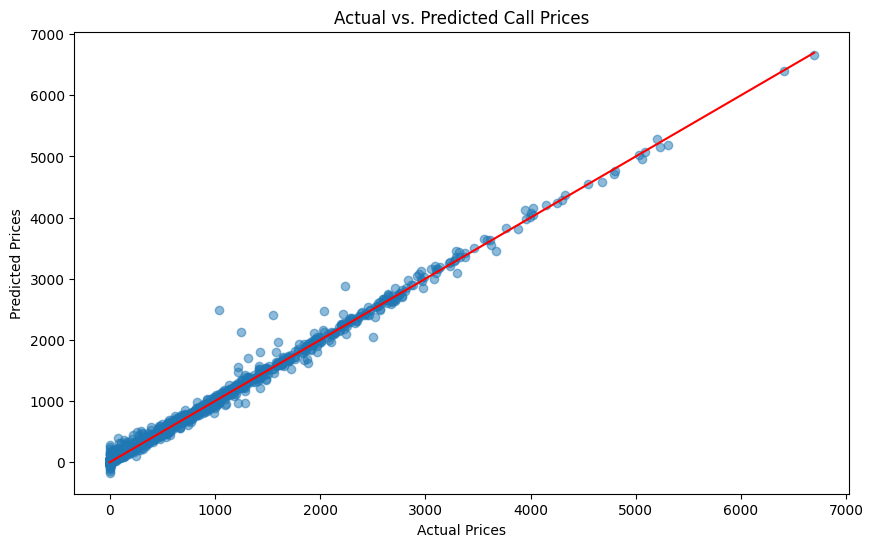

In [ ]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test_scaled).flatten()

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs. Predicted Call Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') # Line for perfect predictions
plt.show()

In [ ]:
import pandas as pd

# Let's assume `predictions` is a numpy array containing the predicted values
# and y_test is the actual values you used for testing the model.

# You can convert the actual and predicted values to a DataFrame like this:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions
})

# Optionally, reset the index of the DataFrame if you want to include the original index as a column:
results_df.reset_index(inplace=True, drop=True)

# Now you can use the results DataFrame as needed
print(results_df)


       Actual    Predicted
0       57.20    53.754585
1        5.40    19.594919
2      361.65   366.417206
3      499.90   512.480957
4       40.90   101.145210
...       ...          ...
2224   195.85   225.152786
2225   978.45   978.698792
2226  1279.05  1273.735718
2227   511.20   562.685974
2228   153.70   183.784744

[2229 rows x 2 columns]


In [ ]:
# Save the DataFrame as an Excel file
results_df.to_excel('predicted_vs_actual.xlsx', index=False)